In [39]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#import seaborn as sns

In [40]:
# read the dataset and drop unuseful columns
census = pd.read_csv('census.csv')
census = census.drop(['fnlwgt','education-num'], axis=1)

In [41]:
# look at the first 5 rows 
census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [42]:
# discover more info  
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
 12  income          48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [43]:
# how many rows and columns
census.shape

(48842, 13)

In [44]:
# look at statistics
census.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [45]:
# checking datatypes
census.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [46]:
# check null values
census.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
# check unique values
census.nunique()

age                74
workclass           9
education          16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      123
capital-loss       99
hours-per-week     96
native-country     42
income              2
dtype: int64

In [48]:
# check values for workclass
census.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [49]:
# check values for occupation
census.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [50]:
# check values for native country
census['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [51]:
# check values for marital status
census['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [52]:
# check values for sex 
census['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [53]:
# check values for race
census['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [54]:
# check values for income
census['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [55]:
# check values for education
census['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [56]:
# missing data
census.loc[census.workclass == '?'].index

Int64Index([    4,     6,    13,    22,    35,    75,    89,   100,   113,
              132,
            ...
            48707, 48758, 48771, 48775, 48806, 48811, 48812, 48820, 48822,
            48823],
           dtype='int64', length=2799)

In [57]:
census.loc[census.occupation == '?'].index

Int64Index([    4,     6,    13,    22,    35,    75,    89,   100,   113,
              132,
            ...
            48707, 48758, 48771, 48775, 48806, 48811, 48812, 48820, 48822,
            48823],
           dtype='int64', length=2809)

In [58]:
# visualize rows that contain '?' 
unknown_rows = census.loc[(census['workclass'] == '?') | (census['native-country'] == '?') | (census['occupation'] == '?')]
unknown_rows.shape

(3620, 13)

In [59]:
# make a copy of the dataset and drop rows that contain '?'
census_copy = census.copy()
census_copy = census_copy.drop(census_copy[(census_copy['occupation'] == '?') | (census_copy['workclass'] == '?') | (census_copy['native-country'] == '?')].index)

In [60]:
# reduce the number of values for 'education' column
census_copy['education'] = census_copy['education'].replace(['5th-6th','1st-4th', 'Preschool','7th-8th','9th','10th','11th','12th'], 'school')
census_copy['education'] = census_copy['education'].replace(['HS-grad'], 'high school grad')
census_copy['education'] = census_copy['education'].replace(['Some-college','Prof-school','Assoc-voc','Assoc-acdm'], 'higher education')
census_copy['education'] = census_copy['education'].replace(['Bachelors'], 'bachelor')
census_copy['education'] = census_copy['education'].replace(['Masters'], 'master')
census_copy['education'] = census_copy['education'].replace(['Doctorate'], 'doc')

In [61]:
# reduce the number of values for 'marital-status' column
census_copy['marital-status'] = census_copy['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'married')
census_copy['marital-status'] = census_copy['marital-status'].replace(['Never-married'], 'not married')
census_copy['marital-status'] = census_copy['marital-status'].replace(['Separated','Divorced','Widowed','Married-spouse-absent'], 'other')

In [62]:
# reduce the number of values for 'education' column and assign a number for each category
census_copy['hours-per-week'] = census_copy['hours-per-week'].astype(int)
census_copy.loc[census_copy['hours-per-week'] < 40, 'hours-per-week'] = 0
census_copy.loc[census_copy['hours-per-week'] == 40, 'hours-per-week'] = 1
census_copy.loc[census_copy['hours-per-week'] > 40, 'hours-per-week'] = 2

In [63]:
# assign a number for each category of 'income', 1 for '>50k', 0 for '<50k'
census_copy['income']=census_copy['income'].map({'<=50K':0, '>50K':1})

In [64]:
# visualize the new dataset
census_copy.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,school,not married,Machine-op-inspct,Own-child,Black,Male,0,0,1,United-States,0
1,38,Private,high school grad,married,Farming-fishing,Husband,White,Male,0,0,2,United-States,0
2,28,Local-gov,higher education,married,Protective-serv,Husband,White,Male,0,0,1,United-States,1
3,44,Private,higher education,married,Machine-op-inspct,Husband,Black,Male,7688,0,1,United-States,1
5,34,Private,school,not married,Other-service,Not-in-family,White,Male,0,0,0,United-States,0


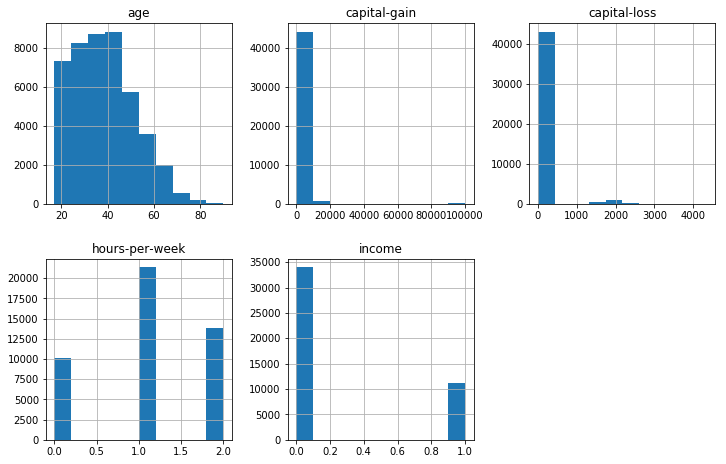

In [65]:
# visualize the distributions of numerical columns
census_copy.hist(figsize=(12,12), layout=(3,3), sharex=False)
plt.show()

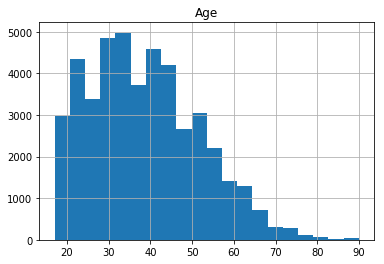

In [66]:
# histogram about people's age 
ageHist = plt.figure()
plt.title('Age')
census_copy['age'].hist(bins = 20)
plt.show()

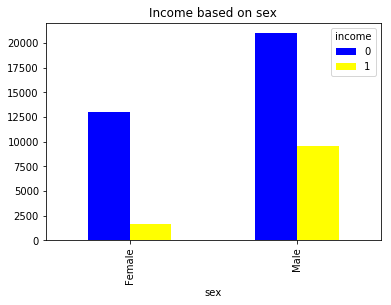

In [67]:
# visualize the income based on sex
income_sex = plt.figure() 
income_sex = pd.crosstab(census_copy['sex'], census_copy['income']) 
income_sex.plot(kind = 'bar', color = ['blue','yellow'], grid = False, title = 'Income based on sex')
plt.show()

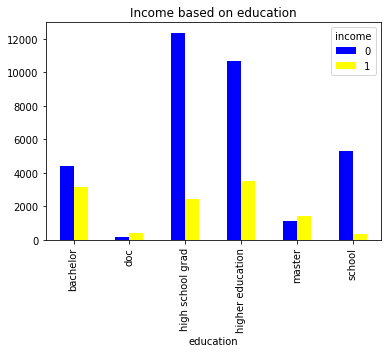

In [68]:
# visualize the income based on education
income_edu = plt.figure() 
income_edu = pd.crosstab(census_copy['education'], census_copy['income'])
income_edu.plot(kind = 'bar', color = ['blue','yellow'], grid = False, title = 'Income based on education')
plt.show()

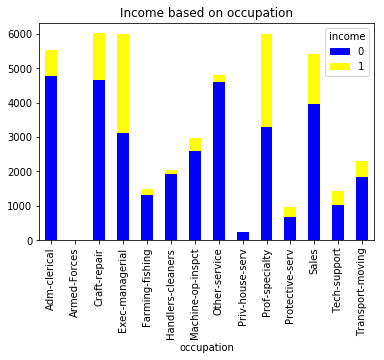

In [69]:
# visualize the income based on occupation
income_occupation = plt.figure() 
income_occupation = pd.crosstab(census_copy['occupation'], census_copy['income']) 
income_occupation.plot(kind = 'bar', stacked = True, color = ['blue','yellow'], grid = False, title = 'Income based on occupation')
plt.show()

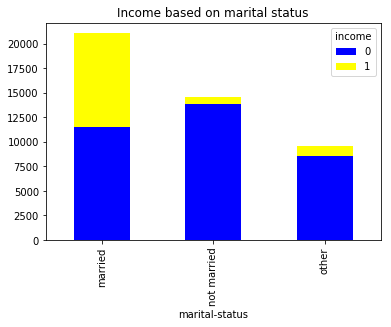

In [70]:
# visualize the income based on marital-status
income_marital = plt.figure()
income_marital = pd.crosstab(census_copy['marital-status'], census_copy['income']) 
income_marital.plot(kind = 'bar', stacked = True, color = ['blue','yellow'], grid = False, title = 'Income based on marital status')
plt.show()

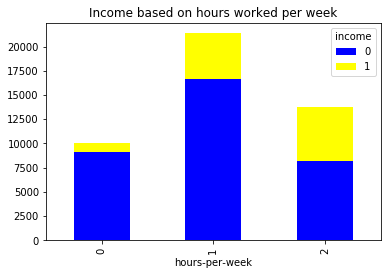

In [71]:
# visualize the income based on hours worked
income_hours = plt.figure()
income_hours = pd.crosstab(census_copy['hours-per-week'], census_copy['income'])
income_hours.plot(kind = 'bar', stacked = True, color = ['blue','yellow'], grid = False, title = 'Income based on hours worked per week')
plt.show()

In [72]:
# visualize correlations among columns
census_copy.corr()

,age,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.079683,0.059351,0.103934,0.237040
capital-gain,0.079683,1.000000,-0.032102,0.076618,0.221034
capital-loss,0.059351,-0.032102,1.000000,0.061273,0.148687
hours-per-week,0.103934,0.076618,0.061273,1.000000,0.261137
income,0.237040,0.221034,0.148687,0.261137,1.000000


In [73]:
# create X and y and transform to numerical values
X = census_copy.drop(['income'], axis=1)
y = census_copy['income']
census_copy = census_copy.apply(LabelEncoder().fit_transform)
census_copy.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,5,1,6,3,2,1,0,0,1,38,0
1,21,2,2,0,4,0,4,1,0,0,2,38,0
2,11,1,3,0,10,0,4,1,0,0,1,38,1
3,27,2,3,0,6,0,2,1,96,0,1,38,1
5,17,2,5,1,7,1,4,1,0,0,0,38,0


In [74]:
# normalize the data
ss = StandardScaler().fit(census_copy.drop('income', axis=1))
X = ss.transform(census_copy.drop('income', axis=1))
y = census_copy['income']

In [75]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [76]:
# perform KNN
k_values = np.arange(1, 25)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    KNN_prediction = knn.predict(X_test)
    scores.append(accuracy_score(y_test, KNN_prediction))

print('KNN Results:')
print(scores.index(max(scores)), max(scores))
print(' ')
print("Training set: {:.3f}".format(knn.score(X_train,y_train)))
print("Test set: {:.3f}".format(knn.score(X_test,y_test)))

KNN Results:
21 0.8404216112626225
 


In [78]:
# classification report and confusion matrix
print(classification_report(y_test, KNN_prediction))
print(confusion_matrix(y_test, KNN_prediction))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10214
           1       0.72      0.57      0.64      3353

    accuracy                           0.84     13567
   macro avg       0.79      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567

[[9463  751]
 [1432 1921]]


In [79]:
# perform Decision Tree
dt = DecisionTreeClassifier(class_weight = None, min_samples_leaf = 100, random_state = 10)
dt.fit(X_train, y_train)

DT_prediction = dt.predict(X_test)

print('Decision tree Results:')
print(accuracy_score(y_test, DT_prediction))
print(' ')
print("Training set: {:.3f}".format(dt.score(X_train,y_train)))
print("Test set: {:.3f}".format(dt.score(X_test,y_test)))

Decision tree Results:
0.8486769366846023
 
Training set: 0.855
Test set: 0.849


In [80]:
# perform Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LR_prediction = lr.predict(X_test)

print('Logistic Regression Results:')
print(accuracy_score(y_test, LR_prediction))
print(' ')
print("Training set: {:.3f}".format(lr.score(X_train,y_train)))
print("Test set: {:.3f}".format(lr.score(X_test,y_test)))

Logistic Regression Results:
0.812633596226137
 
Training set: 0.812
Test set: 0.813


In [81]:
# perform SVM
svc = SVC()
svc.fit(X_train, y_train)

SVC_prediction = svc.predict(X_test)

print('SVC Results:')
print(accuracy_score(y_test, SVC_prediction))
print(' ')
print("Training set: {:.3f}".format(svc.score(X_train,y_train)))
print("Test set: {:.3f}".format(svc.score(X_test,y_test)))

SVC Results:
0.8324611188914277
 
Training set: 0.837
Test set: 0.832


In [82]:
# perform Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RFC_prediction = rfc.predict(X_test)

print('Random Forest Results:')
print(accuracy_score(y_test, RFC_prediction))
print(' ')
print("Training set: {:.3f}".format(rfc.score(X_train,y_train)))
print("Test set: {:.3f}".format(rfc.score(X_test,y_test)))

Random Forest Results:
0.8373995724920764
 
Training set: 0.954
Test set: 0.837


In [83]:
# Random Forest hyperparameter tuning
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843437 using {'max_features': 'log2', 'n_estimators': 1000}
0.839520 (0.006557) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.842195 (0.006321) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.843079 (0.006818) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.839109 (0.006168) with: {'max_features': 'log2', 'n_estimators': 10}
0.842732 (0.006408) with: {'max_features': 'log2', 'n_estimators': 100}
0.843437 (0.006595) with: {'max_features': 'log2', 'n_estimators': 1000}


In [84]:
# decision tree hyperparameter tuning
max_depth = range(1,10)
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)
criterion = ["gini", "entropy"]
# define grid search
grid = dict(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,criterion=criterion)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845533 using {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 9}
0.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.751856 (0.000119) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.7